### Analysing Data From 2019 Kaggle ML and DS Survey ###

In [1]:
import psutil
import warnings
import numpy as np
import plotly as py
import pandas as pd
import seaborn as sns 
import matplotlib as plt
import plotly.express as px
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.io as pio
pio.renderers.default = "png"


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/pguisordi/python_projects/trybe_test/kaggle_survey_2019/multiple_choice_responses.csv',
                   encoding='utf8', low_memory=False)
data.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [3]:
# Checking kind of data we have
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19718 entries, 0 to 19717
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: object(246)
memory usage: 37.0+ MB


### Checking Gender Answers ###

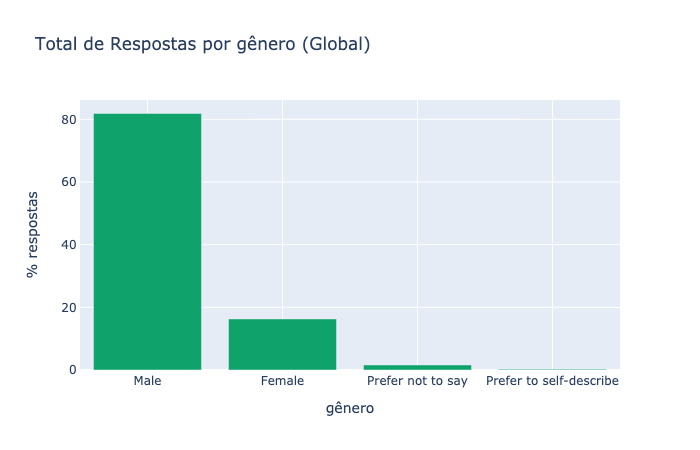

In [4]:
gender=data['Q2'][1:].value_counts().reset_index()
gender.rename(columns={"index": "sex", "Q2": "total_responses"}, inplace = True)
gender['total per %'] = np.around(((gender['total_responses']/gender.total_responses.sum())*100), decimals =2)
fig = go.Figure([go.Bar(x= gender.sex, 
                        y=gender['total per %'],
                       marker = dict(
                         color='#0fa36b'))])
fig.update_layout(autosize=False,
                    width=600,
                    height=500,
                    title=" Total de Respostas por gênero (Global)",
                 yaxis_title='% respostas',
                  xaxis_title='gênero')
py.offline.iplot(fig, filename='horizontal-bar')

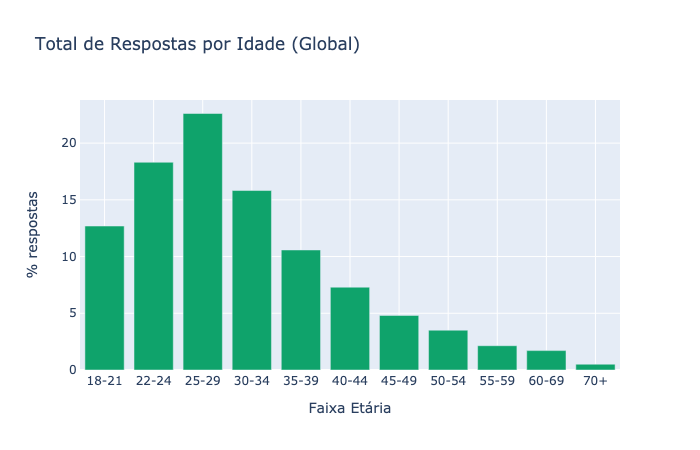

In [5]:
age = data['Q1'][1:].value_counts().reset_index().sort_values(by = 'index')
age.rename(columns={"index": "age", "Q1": "total_reponses"}, inplace = True)
age['total per %'] = np.around(((age['total_reponses']/age.total_reponses.sum())*100), decimals =2)
fig = go.Figure([go.Bar(x= age.age, 
                        y=age['total per %'],
                       marker = dict(
                         color='#0fa36b'))])
fig.update_layout(title=" Total de Respostas por Idade (Global)",
                 yaxis_title='% respostas',
                  xaxis_title='Faixa Etária')
py.offline.iplot(fig, filename='horizontal-bar')

In [6]:
# how many countries we have ?
data['Q3'][1:].nunique()

59

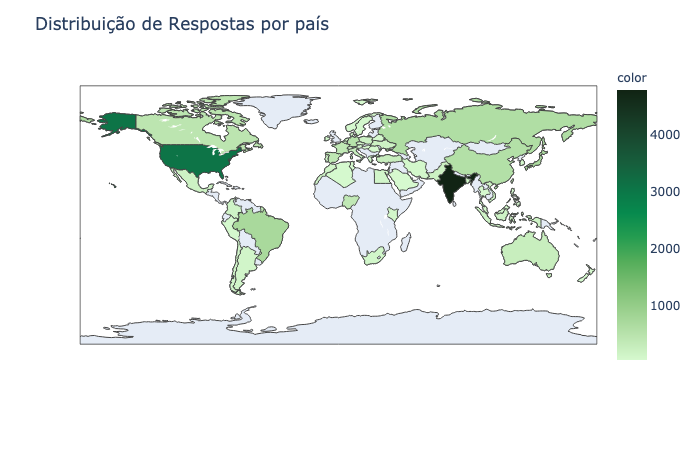

In [7]:
countries= data['Q3'][1:].value_counts().reset_index()
countries.rename(columns={"index": "country", "Q3": "total_responses"}, inplace = True)
countries = countries.replace('United Kingdom of Great Britain and Northern Ireland', 'UK and Northern Ireland')
countries['total per %'] = np.around(((countries['total_responses']/countries.total_responses.sum())*100), decimals =2)

fig = px.choropleth(countries['total_responses'], locations= countries.country,
                    locationmode='country names',
                    color=countries['total_responses'],
                    color_continuous_scale=px.colors.sequential.algae)
fig.update_layout(title="Distribuição de Respostas por país")
py.offline.iplot(fig, filename='horizontal-bar')

In [8]:
countries.loc[3]

country            Brazil
total_responses       728
total per %          3.69
Name: 3, dtype: object

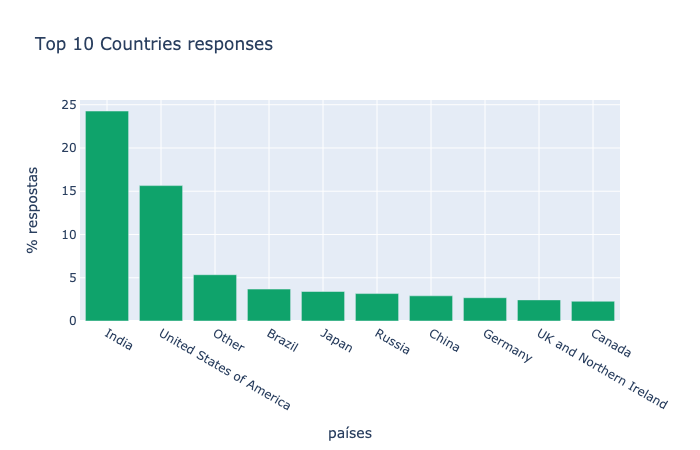

In [9]:
countries[['country', 'total per %']][0:10]
fig = go.Figure([go.Bar(x= countries.country[0:10], 
                        y=countries['total per %'][0:10],
                       marker = dict(
                         color='#0fa36b'))])
fig.update_layout(title= "Top 10 Countries responses",
                 yaxis_title='% respostas',
                 xaxis_title='países')
py.offline.iplot(fig, filename='horizontal-bar')

Brazil answers are: 3.69% (4th in the rank - where we have Other)

In [10]:
countries_without_other = data['Q3'][1:].loc[data['Q3'] != "Other"].value_counts().reset_index()
countries_without_other.rename(columns={'index': 'country', 'Q3':'total_responses'}, inplace = True)
countries_without_other['total per %'] = np.around(
                                        ((countries_without_other['total_responses']/countries_without_other.total_responses.sum()
                                         )*100), decimals=2)
countries_without_other.head(5)

,country,total_responses,total per %
0,India,4786,25.64
1,United States of America,3085,16.53
2,Brazil,728,3.90
3,Japan,673,3.61
4,Russia,626,3.35


quando tiramos o outros temos um aumento de 3.69 para 4% de respostas no conjunto de dados

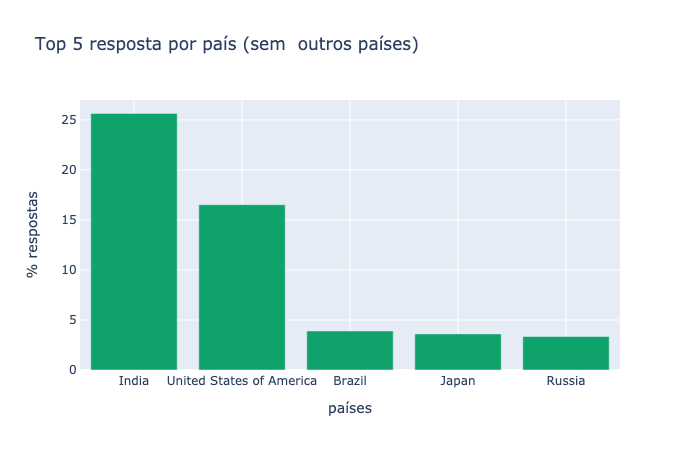

In [11]:
fig = go.Figure([go.Bar(x= countries_without_other['country'][0:5], 
                        y=countries_without_other['total per %'][0:5],
                       marker = dict(
                         color='#0fa36b'))])
fig.update_layout(title= "Top 5 resposta por país (sem  outros países)",
                     yaxis_title='% respostas',
                     xaxis_title='países')
py.offline.iplot(fig, filename='horizontal-bar')

We are interested to know more about Brazilian who answered this survey.</p>
**Remember:** people who answered this survey lives in Brazil (we are assume they are Brazillian)

### Age ###

In [12]:
brazil_answers = data.loc[data['Q3'] == 'Brazil']

In [13]:
brazil_age = brazil_answers.Q1.value_counts(dropna=False).reset_index().rename(columns={'index':'age',
                                                              'Q1': 'total_responses'}).sort_values(by='age')
brazil_age['Total per %'] =  np.around(
                                        ((brazil_age['total_responses']/brazil_age.total_responses.sum()
                                         )*100), decimals = 2)
brazil_age = brazil_age.sort_values(by = 'age').reset_index(drop=True)
brazil_age

,age,total_responses,Total per %
0,18-21,43,5.91
1,22-24,82,11.26
2,25-29,181,24.86
3,30-34,137,18.82
4,35-39,101,13.87
5,40-44,78,10.71
6,45-49,40,5.49
7,50-54,30,4.12
8,55-59,18,2.47
9,60-69,15,2.06


In [14]:
brazil_age['Total per %'][0:4].sum()

60.85

More than 60% of people who answered the survey are between 18 - 34 years old. </p>
Interesting to note that people are between 18-21 years old are 5.91% 

Checking with businnes area our students / candidates years old

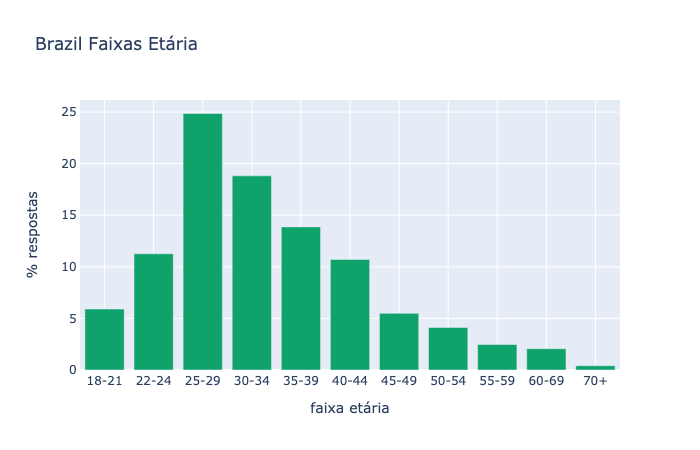

In [15]:
fig = go.Figure([go.Bar(x= brazil_age['age'], 
                        y=brazil_age['Total per %'],
                       marker = dict(
                         color='#0fa36b'))])
fig.update_layout(title= "Brazil Faixas Etária",
                 yaxis_title='% respostas',
                xaxis_title='faixa etária')
py.offline.iplot(fig, filename='horizontal-bar')

### Formal Education ###

In [16]:
brazil_formal_education = brazil_answers[['Q1', 'Q4']]
brazil_formal_education.rename(columns={'Q1': 'age',
                                       'Q4': 'educational_level'},inplace = True)

We aggregate the categories: </p>
* Bachelor's degree
* Professional degree
* Some college/university study without earning bachelor's degree 

In a unique category : higher education level - people who continues their studings before High School

In [17]:
brazil_formal_education['educational_level'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Professional degree',
       'Doctoral degree', 'No formal education past high school',
       'I prefer not to answer',
       'Some college/university study without earning a bachelor’s degree',
       nan], dtype=object)

In [18]:
list_education=[]
for level in brazil_formal_education['educational_level']:
    if level in ['Professional degree']:
        list_education.append('Bachelor’s degree')
    elif level in ['Some college/university study without earning a bachelor’s degree']:
        list_education.append('Bachelor’s degree')    
    else :
        list_education.append(level)
brazil_formal_education['educational_level'] = list_education

In [19]:
br_education_agg = brazil_formal_education.educational_level.value_counts(dropna=False).reset_index().rename(
                    columns={'index':'educational_level',
                             'educational_level': 'total_responses'})
br_education_agg['total per %'] = np.round((br_education_agg['total_responses'] / 
                                           br_education_agg['total_responses'].sum())*100, decimals=2)
br_education_agg = br_education_agg.reset_index(drop = True)
br_education_agg

,educational_level,total_responses,total per %
0,Bachelor’s degree,318,43.68
1,Master’s degree,283,38.87
2,Doctoral degree,98,13.46
3,NaN,13,1.79
4,I prefer not to answer,9,1.24
5,No formal education past high school,7,0.96


In [20]:
# Master + Doctoral
38.87+13.46

52.33

We can notice the number of people who has Master's degree and uses Kaggle (assumption) is high in Brazil. 

Only 0.8% of Brazilians has Master's Degree, and a lower percentual (0,2% has Doctoral degree) in 2019, (https://www1.folha.uol.com.br/educacao/2019/09/acesso-a-mestrado-no-brasil-e-16-vezes-menor-do-que-em-paises-ricos.shtml)

People who answered the survey and has Master or Doctoral as last educational level is 52.33%

13 people who live in Brazil did not answer the question, we assume they did not prefer to answer and adding they in the option "I prefer not answer"

In [21]:
#adjusting NaN answers
sum_3_4 = br_education_agg['total_responses'][3]+br_education_agg['total_responses'][4]
br_education_agg['total_responses'][4] = sum_3_4 #22 answers
br_education_agg = br_education_agg.dropna()
br_education_agg['total per %'] = np.around(
                                        ((br_education_agg['total_responses']/br_education_agg.total_responses.sum()
                                         )*100), decimals = 2)
br_education_agg

,educational_level,total_responses,total per %
0,Bachelor’s degree,318,43.68
1,Master’s degree,283,38.87
2,Doctoral degree,98,13.46
4,I prefer not to answer,22,3.02
5,No formal education past high school,7,0.96


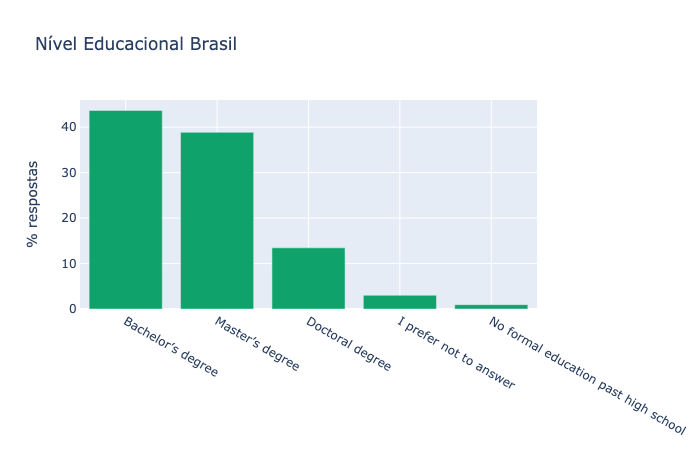

In [22]:
fig = go.Figure([go.Bar(x= br_education_agg['educational_level'], 
                        y=br_education_agg['total per %'],
                       marker = dict(
                         color='#0fa36b'))])
fig.update_layout(title= "Nível Educacional Brasil",
                 yaxis_title='% respostas')
py.offline.iplot(fig, filename='horizontal-bar')

In [23]:
36/42

0.8571428571428571

In [24]:
#checking distribution of age per educational level
br_age_educ = pd.crosstab(brazil_formal_education['educational_level'], brazil_formal_education['age']).apply(
                                                        lambda r: np.round((r/r.sum()*100), decimals = 2), axis=0)
br_age_educ

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
educational_level,,,,,,,,,,,
Bachelor’s degree,85.71,62.96,48.59,34.33,37.37,36.36,37.5,20.69,44.44,26.67,33.33
Doctoral degree,0.00,2.47,7.34,20.15,14.14,18.18,25.0,17.24,27.78,46.67,33.33
I prefer not to answer,0.00,2.47,0.56,1.49,1.01,1.30,2.5,3.45,0.00,0.00,0.00
Master’s degree,11.90,32.10,43.50,43.28,47.47,42.86,30.0,51.72,27.78,26.67,33.33
No formal education past high school,2.38,0.00,0.00,0.75,0.00,1.30,5.0,6.90,0.00,0.00,0.00


In [25]:
br_age_educ.iloc[0, 0:].max()

85.71

In [26]:
br_age_educ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Bachelor’s degree to No formal education past high school
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   18-21   5 non-null      float64
 1   22-24   5 non-null      float64
 2   25-29   5 non-null      float64
 3   30-34   5 non-null      float64
 4   35-39   5 non-null      float64
 5   40-44   5 non-null      float64
 6   45-49   5 non-null      float64
 7   50-54   5 non-null      float64
 8   55-59   5 non-null      float64
 9   60-69   5 non-null      float64
 10  70+     5 non-null      float64
dtypes: float64(11)
memory usage: 480.0+ bytes


### Current Role ### 

In [27]:
brazil_role = brazil_answers['Q5'].value_counts(dropna=False).reset_index().rename(columns={'index':'current_role',
                                                              'Q5': 'total_responses'})
brazil_role['total per %'] = np.around(((brazil_role['total_responses']/brazil_role.total_responses.sum()
                                         )*100), decimals = 2)
brazil_role

,current_role,total_responses,total per %
0,Data Scientist,164,22.53
1,Software Engineer,102,14.01
2,Student,97,13.32
3,Other,70,9.62
4,Data Analyst,63,8.65
5,Research Scientist,62,8.52
6,Business Analyst,48,6.59
7,Product/Project Manager,29,3.98
8,Data Engineer,27,3.71
9,Not employed,25,3.43


In [28]:
#checking % of 3 first positions
np.round(brazil_role['total per %'][0:3].sum())

50.0

Around 50% of people who answering this survey in Brazi are DS, SE or Student 

### Checking Current Role *versus* Formal Education in Brazil

In [29]:
# Checking if NaN values when we cross data 
cross_br_current_educ = brazil_answers[['Q4', 'Q5']].fillna(value = "no answer")
not_answer_cross = cross_br_current_educ.loc[cross_br_current_educ['Q5'] == 'no answer']
not_answer_cross.groupby(['Q4'])['Q5'].count()

Q4
Bachelor’s degree                                                     1
Doctoral degree                                                       1
Some college/university study without earning a bachelor’s degree     1
no answer                                                            13
Name: Q5, dtype: int64

In our next table without 16 answers (around 2% of the valid answers) - its not so significantly so Ok 

In [30]:
 pd.crosstab(brazil_answers['Q4'],brazil_answers['Q5'], margins = True)

Q5,Business Analyst,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Not employed,Other,Product/Project Manager,Research Scientist,Software Engineer,Statistician,Student,All
Q4,,,,,,,,,,,,,
Bachelor’s degree,21,2,28,8,44,10,24,7,6,49,5,43,247
Doctoral degree,5,0,3,3,19,1,14,5,33,2,1,11,97
I prefer not to answer,0,0,1,0,2,2,2,0,1,1,0,0,9
Master’s degree,15,4,21,13,89,11,25,13,19,38,9,26,283
No formal education past high school,1,1,1,0,0,0,0,0,0,1,0,3,7
Professional degree,2,1,5,3,4,1,2,3,2,7,1,2,33
Some college/university study without earning a bachelor’s degree,4,1,4,0,6,0,3,1,1,4,0,12,36
All,48,9,63,27,164,25,70,29,62,102,16,97,712


In [31]:
21/48

0.4375

In [32]:
list_education=[]
for level in cross_br_current_educ['Q4']:
    if level in ['Professional degree']:
        list_education.append('Bachelor’s degree')
    elif level in ['Some college/university study without earning a bachelor’s degree']:
        list_education.append('Bachelor’s degree')    
    else :
        list_education.append(level)
cross_br_current_educ['Q4'] = list_education

In [33]:
brazil_current_educ = pd.crosstab(cross_br_current_educ['Q4'],cross_br_current_educ['Q5']).apply(
                                                        lambda r: np.round((r/r.sum()*100), decimals = 2), axis=0)
brazil_current_educ = brazil_current_educ.reset_index().rename(columns={'Q4':'educational_level'})
brazil_current_educ

Q5,educational_level,Business Analyst,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Not employed,Other,Product/Project Manager,Research Scientist,Software Engineer,Statistician,Student,no answer
0,Bachelor’s degree,56.25,44.44,58.73,40.74,32.93,44.0,41.43,37.93,14.52,58.82,37.50,58.76,12.50
1,Doctoral degree,10.42,0.00,4.76,11.11,11.59,4.0,20.00,17.24,53.23,1.96,6.25,11.34,6.25
2,I prefer not to answer,0.00,0.00,1.59,0.00,1.22,8.0,2.86,0.00,1.61,0.98,0.00,0.00,0.00
3,Master’s degree,31.25,44.44,33.33,48.15,54.27,44.0,35.71,44.83,30.65,37.25,56.25,26.80,0.00
4,No formal education past high school,2.08,11.11,1.59,0.00,0.00,0.0,0.00,0.00,0.00,0.98,0.00,3.09,0.00
5,no answer,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,81.25


We aggregate the categories: </p>
* Bachelor's degree
* Professional degree
* Some college/university study without earning bachelor's degree 

In a unique category : higher education level - people who continues their studings before High Scholl

In [34]:
# checking currents that working with data in their daily activities
brazil_data_roles = brazil_current_educ[['educational_level','Business Analyst', 'Data Analyst', 'Data Scientist', 'Statistician']]
brazil_data_roles['sort'] = [2,4,6,3,1,0]
brazil_data_roles.sort_values (by = 'sort',inplace = True)
brazil_data_roles = brazil_data_roles.reset_index(drop=True)

0.8% tem mestrado no Brasil, 89 responderam de quem usa Kaggle no BR atua como cientista de dados

lembrando que some college/university study.... é alguém que tem nível superior (pensando na realidade dos USA)</p>
bachelor's degree tb é alguém com ensino superior </p>
professional degree pode ser alguém com ensino superior ou não (pode ser apenas nível técnico)</p>

In [35]:
brazil_data_roles

Q5,educational_level,Business Analyst,Data Analyst,Data Scientist,Statistician,sort
0,no answer,0.00,0.00,0.00,0.00,0
1,No formal education past high school,2.08,1.59,0.00,0.00,1
2,Bachelor’s degree,56.25,58.73,32.93,37.50,2
3,Master’s degree,31.25,33.33,54.27,56.25,3
4,Doctoral degree,10.42,4.76,11.59,6.25,4
5,I prefer not to answer,0.00,1.59,1.22,0.00,6


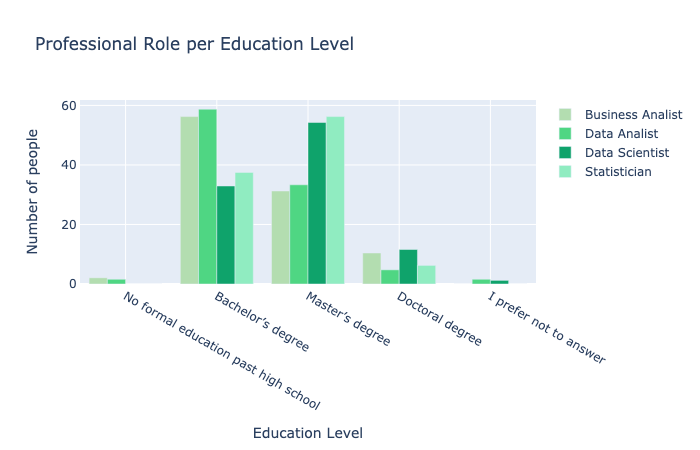

In [36]:
trace1= go.Bar(x= brazil_data_roles['educational_level'][1:6], 
                y= brazil_data_roles['Business Analyst'][1:6].values,
                name = 'Business Analist',
                marker = dict(
                    color='#b3ddb0'))
trace2= go.Bar(x= brazil_data_roles['educational_level'][1:6], 
                y= brazil_data_roles['Data Analyst'][1:6].values,
                name = 'Data Analist',
                marker = dict(
                    color='#4FD683'))
trace3= go.Bar(x= brazil_data_roles['educational_level'][1:6], 
                y= brazil_data_roles['Data Scientist'][1:6].values,
                name = 'Data Scientist',
                marker = dict(
                    color='#0fa36b'))
trace4= go.Bar(x= brazil_data_roles['educational_level'][1:6], 
                y= brazil_data_roles['Statistician'][1:6].values,
                name = 'Statistician',
                marker = dict(
                    color='#90ECC1'))

plot = [trace1, trace2,trace3,trace4]

layout = go.Layout(
    barmode='group',title='Professional Role per Education Level',yaxis_title='Number of people',
    xaxis_title='Education Level'
)

fig = go.Figure(data=plot, layout=layout)
py.offline.iplot(fig, filename='horizontal-bar')

### Brazil Media Source ###

In [37]:
data['Q12_Part_1'][0]

'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)'

In [38]:
brazil_media_values = list()
brazil_media_text = list()
for i in range(12):
    value=brazil_answers['Q12_Part_'+str(i+1)].value_counts()[0]
    brazil_media_values.append(value)
    text=brazil_answers['Q12_Part_'+str(i+1)].value_counts().index[0]
    brazil_media_text.append(text)
data_tuples = list(zip(brazil_media_text,brazil_media_values))
brazil_media = pd.DataFrame(data_tuples, columns=['media', 'total_people']).sort_values('total_people', 
                                                                                        ascending = False)
brazil_media['total per %'] = np.round(((brazil_media['total_people']/brazil_media['total_people'].sum())*100)
                                       , decimals =2)
brazil_media.reset_index(inplace = True, drop = True)
brazil_media.sort_values(by='total per %', ascending = False)

brazil_media['media_short']=[ 'kaggle', 'blogs', 'YouTube', 'Journals', 'Course Foruns', 'Podcasts', 'Twitter', 'Reddit',
                       'Slack', 'Hacker News', 'Outhers', 'None']

In [39]:
#kaggle + blogs + youtube 
19.84+18.86+15.15

53.85

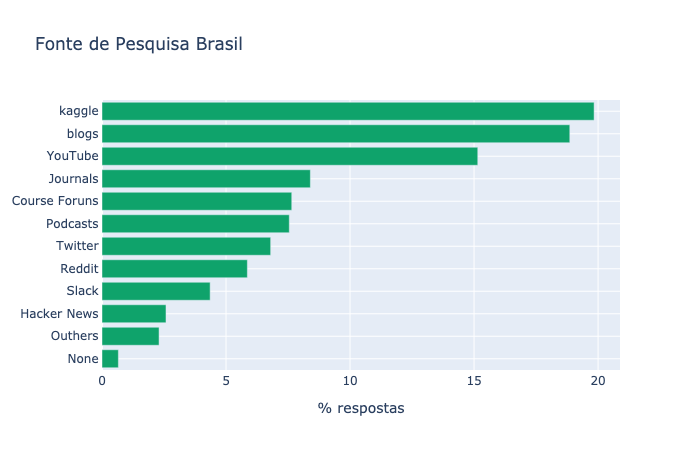

In [40]:
fig = go.Figure([go.Bar(x= brazil_media['total per %'], 
                        y=brazil_media['media_short'],
                        marker = dict(
                         color='#0fa36b'),
                        orientation='h')])
fig.update_layout(title= "Fonte de Pesquisa Brasil", yaxis={'categoryorder':'max ascending'},
                   xaxis_title='% respostas')
py.offline.iplot(fig, filename='horizontal-bar')

### Brazil Media Source - accessing level education ###

In [41]:
br_media_educ = brazil_answers[['Q4', 'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4', 'Q12_Part_5',
                                'Q12_Part_6','Q12_Part_7','Q12_Part_8', 'Q12_Part_9','Q12_Part_10', 'Q12_Part_11',
                               'Q12_Part_12']].reset_index(drop=True)
br_media_educ.columns = ['education_level', 'twitter', 'hacker news', 'reddit', 'kaggle', 'course foruns', 'YouTube',
                         'podcasts', 'blogs', 'journal publications', 'slack communities', 'none', 'other']
br_media_educ.fillna(value = 0, inplace = True)
#using higher education
br_media_educ['education_level'] = br_media_educ['education_level'].replace(
                                  "Bachelor’s degree", 'Higher Education').replace(
                                 'Professional degree', 'Higher Education').replace(
                                "Some college/university study without earning a bachelor’s degree", 
                                'Higher Education')
br_media_educ.head(2)

,education_level,twitter,hacker news,reddit,kaggle,course foruns,YouTube,podcasts,blogs,journal publications,slack communities,none,other
0,Higher Education,0,0,"Reddit (r/machinelearning, r/datascience, etc)","Kaggle (forums, blog, social media, etc)",0,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",0,"Slack Communities (ods.ai, kagglenoobs, etc)",0,0
1,Master’s degree,0,0,0,"Kaggle (forums, blog, social media, etc)",0,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",0,"Blogs (Towards Data Science, Medium, Analytics...",0,0,0,0


In [42]:
#input values in any type of media
br_media_educ.loc[br_media_educ['twitter'] !=0, "twitter"] = 1
br_media_educ.loc[br_media_educ['hacker news'] !=0, "hacker news"] = 1
br_media_educ.loc[br_media_educ['reddit'] !=0, "reddit"] = 1
br_media_educ.loc[br_media_educ['kaggle'] !=0, "kaggle"] = 1
br_media_educ.loc[br_media_educ['course foruns'] !=0, "course foruns"] = 1
br_media_educ.loc[br_media_educ['YouTube'] !=0, "YouTube"] = 1
br_media_educ.loc[br_media_educ['podcasts'] !=0, "podcasts"] = 1
br_media_educ.loc[br_media_educ['blogs'] !=0, "blogs"] = 1
br_media_educ.loc[br_media_educ['journal publications'] !=0, "journal publications"] = 1
br_media_educ.loc[br_media_educ['slack communities'] !=0, "slack communities"] = 1
br_media_educ.loc[br_media_educ['none'] !=0, "none"] = 1
br_media_educ.loc[br_media_educ['other'] !=0, "other"] = 1

br_media_educ.head(3)

,education_level,twitter,hacker news,reddit,kaggle,course foruns,YouTube,podcasts,blogs,journal publications,slack communities,none,other
0,Higher Education,0,0,1,1,0,1,1,1,0,1,0,0
1,Master’s degree,0,0,0,1,0,1,0,1,0,0,0,0
2,Higher Education,0,0,1,0,0,0,0,1,1,0,0,0


#### Looking Higher Education closely #####

In [43]:
#checking consulting media source by education level
br_media_educ_group = br_media_educ.groupby('education_level')['twitter','hacker news','reddit','kaggle', 'course foruns','YouTube',
                                         'podcasts','blogs','journal publications', 'slack communities','none',
                                         'other'].sum().reset_index().drop(index = 0)
br_media_educ_group

,education_level,twitter,hacker news,reddit,kaggle,course foruns,YouTube,podcasts,blogs,journal publications,slack communities,none,other
1,Doctoral degree,16,6,13,54,22,32,8,43,50,9,3,3
2,Higher Education,61,32,55,184,72,155,82,176,53,45,7,28
3,I prefer not to answer,0,1,0,6,3,3,1,7,2,1,0,1
4,Master’s degree,66,16,56,172,65,127,69,175,74,38,4,17
5,No formal education past high school,2,0,1,7,1,6,1,1,0,0,0,0


We can notice that independente of education leve, people who answered the survey access one of the medias source

In [44]:
higher_media_educ = br_media_educ_group.loc[br_media_educ_group['education_level'] == 'Higher Education'
                                           ].drop(columns = ['education_level']).reset_index(drop = True)
total_higher_educ = br_media_educ.loc[br_media_educ['education_level'] == 'Higher Education'].shape[0]

In [45]:
np.round((higher_media_educ/total_higher_educ)*100, decimals=2)

,twitter,hacker news,reddit,kaggle,course foruns,YouTube,podcasts,blogs,journal publications,slack communities,none,other
0,19.18,10.06,17.3,57.86,22.64,48.74,25.79,55.35,16.67,14.15,2.2,8.81


### Brazil Plataform Courses ###

In [46]:
data['Q13_Part_1'][0]

'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity'

In [47]:
brazil_courses_values = list()
brazil_courses_text = list()
for i in range(12):
    value=brazil_answers['Q13_Part_'+str(i+1)].value_counts()[0]
    brazil_courses_values.append(value)
    text=brazil_answers['Q13_Part_'+str(i+1)].value_counts().index[0]
    brazil_courses_text.append(text)
data_tuples = list(zip(brazil_courses_text,brazil_courses_values))
brazil_courses = pd.DataFrame(data_tuples, columns=['course', 'total_people']).sort_values('total_people', 
                                                                                        ascending = False)
brazil_courses['total per %'] = np.round(((brazil_courses['total_people']/brazil_courses['total_people'].sum())*100)
                                       , decimals =2)
brazil_courses.reset_index(inplace = True, drop = True)
brazil_courses.sort_values(by='total per %', ascending = False)

,course,total_people,total per %
0,Coursera,343,19.40
1,Udemy,326,18.44
2,Kaggle Courses (i.e. Kaggle Learn),206,11.65
3,Udacity,204,11.54
4,University Courses (resulting in a university ...,171,9.67
5,DataCamp,157,8.88
6,edX,151,8.54
7,Other,71,4.02
8,LinkedIn Learning,46,2.60
9,Fast.ai,38,2.15


* Coursera has 1814 courses about DS - source (https://www.coursera.org/search?query=data%20science&)
* Udemy has 10 thousand courses with with the expression *data scince* - source (https://www.udemy.com/courses/search/?q=data+science)

Language could be a problem for people who do not speak English

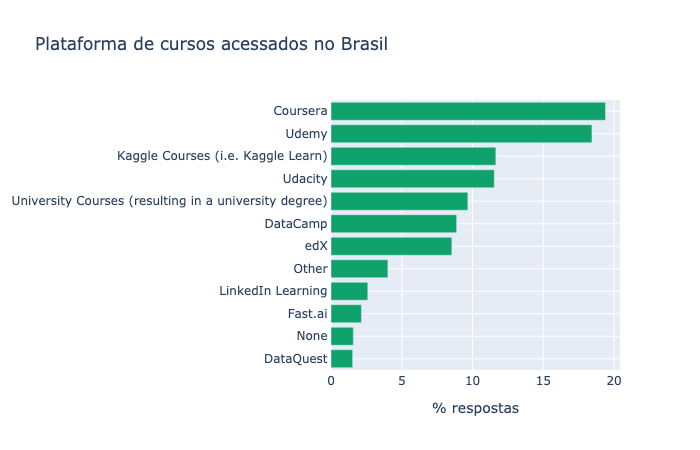

In [48]:
fig = go.Figure([go.Bar(x= brazil_courses['total per %'], 
                        y=brazil_courses['course'],
                        marker = dict(
                         color='#0fa36b'),
                        orientation='h')])
fig.update_layout(title= "Plataforma de cursos acessados no Brasil", yaxis={'categoryorder':'max ascending'},
                   xaxis_title='% respostas')
py.offline.iplot(fig, filename='horizontal-bar')

Need to remember that Coursera most of the courses are in English and in Udemy we have a lot of courses in Portuguese about programming + analytics and data science

#### Looking Higher Education closely #####

In [49]:
br_courses_educ = brazil_answers[['Q4', 'Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5',
                                'Q13_Part_6','Q13_Part_7','Q13_Part_8', 'Q13_Part_9','Q13_Part_10', 'Q13_Part_11',
                               'Q13_Part_12']].reset_index(drop=True)
br_courses_educ.columns = ['education_level', 'Coursera','Udemy', 'Kaggle Courses (i.e. Kaggle Learn)', 'Udacity',
                            'University Courses (resulting in a university degree)','DataCamp','edX','Other', 
                            'LinkedIn Learning','Fast.ai','None', 'DataQuest']
br_courses_educ.fillna(value = 0, inplace = True)
br_courses_educ['education_level'] = br_courses_educ['education_level'].replace(
                                  "Bachelor’s degree", 'Higher Education').replace(
                                 'Professional degree', 'Higher Education').replace(
                                "Some college/university study without earning a bachelor’s degree", 
                                'Higher Education')
for col in br_courses_educ.columns[1:]:
    br_courses_educ.loc[br_courses_educ[col] != 0, col] =1
br_courses_group = br_courses_educ.groupby('education_level')['Coursera','Udemy', 'Kaggle Courses (i.e. Kaggle Learn)', 'Udacity',
                            'University Courses (resulting in a university degree)','DataCamp','edX','Other', 
                            'LinkedIn Learning','Fast.ai','None', 'DataQuest'].sum().reset_index().drop(index = 0)
br_courses_group

,education_level,Coursera,Udemy,Kaggle Courses (i.e. Kaggle Learn),Udacity,University Courses (resulting in a university degree),DataCamp,edX,Other,LinkedIn Learning,Fast.ai,None,DataQuest
1,Doctoral degree,26,43,24,13,3,25,4,32,8,25,8,7
2,Higher Education,89,136,60,73,15,98,20,165,18,59,13,34
3,I prefer not to answer,1,4,0,1,1,4,0,5,2,0,1,1
4,Master’s degree,87,159,66,70,7,75,14,119,18,87,6,28
5,No formal education past high school,1,1,1,0,1,4,0,5,0,0,0,1


In [50]:
higher_courses_educ = br_courses_group.loc[br_courses_group['education_level'] == 'Higher Education'
                                           ].drop(columns = ['education_level']).reset_index(drop = True)
total_courses_educ = br_courses_educ.loc[br_courses_educ['education_level'] == 'Higher Education'].shape[0]
np.round((higher_courses_educ/total_higher_educ*100), decimals=2)


,Coursera,Udemy,Kaggle Courses (i.e. Kaggle Learn),Udacity,University Courses (resulting in a university degree),DataCamp,edX,Other,LinkedIn Learning,Fast.ai,None,DataQuest
0,27.99,42.77,18.87,22.96,4.72,30.82,6.29,51.89,5.66,18.55,4.09,10.69


### Brazil Salary ###

### General ###

In [51]:
data['Q10'][0]

'What is your current yearly compensation (approximate $USD)?'

In [52]:
brazil_salary = brazil_answers[['Q4', 'Q5','Q10']]
brazil_salary.rename(columns={'Q4': 'education_level',
                              'Q5': 'current role',
                              'Q10': 'yearly_compensation(USD)'}, inplace = True)
brazil_salary.fillna(value = 'no answer', inplace = True)

brazil_salary['education_level'] = brazil_salary['education_level'].replace(
                                  "Bachelor’s degree", 'Higher Education').replace(
                                 'Professional degree', 'Higher Education').replace(
                                "Some college/university study without earning a bachelor’s degree", 
                                'Higher Education')
brazil_salary.head(2)

,education_level,current role,yearly_compensation(USD)
35,Higher Education,Data Scientist,"10,000-14,999"
38,Master’s degree,Data Analyst,"25,000-29,999"


It is important to notice that yearly_compensation is the USD salary in the year. We will change it to reais and by monthly 

In [53]:
#checking answers again
brazil_salary.shape[0]

728

In [54]:
br_yearly_compensation = brazil_salary['yearly_compensation(USD)'].value_counts(dropna=False).reset_index(
                        ).rename(columns={'index':'yearly_compensation(USD)',
                                          'yearly_compensation(USD)': 'total_responses'})
br_yearly_compensation['total per %'] = np.round(
                        (br_yearly_compensation['total_responses']/br_yearly_compensation['total_responses'].sum())
                        *100, decimals =2)
br_yearly_compensation.sort_values(by= 'yearly_compensation(USD)')

#sort_values by salary range
br_yearly_compensation['sort']=br_yearly_compensation['yearly_compensation(USD)'].str.extract('(\d+)', expand=False
                                ).astype('float')
br_yearly_compensation['sort'].fillna(value = -1, inplace = True) #insert value in NaN
br_yearly_compensation = br_yearly_compensation.sort_values(by = 'sort').reset_index(drop=True)

#aggregate some values 
sum_19_25 = br_yearly_compensation['total_responses'][19:25].sum()
percent_19_25 = np.round((sum_19_25/br_yearly_compensation['total_responses'].sum())*100, decimals =2)
br_yearly_compensation['yearly_compensation(USD)'][20] = '> 125,000'
br_yearly_compensation['total_responses'][20] = sum_19_25
br_yearly_compensation['total per %'][20] = percent_19_25

br_yearly_compensation = br_yearly_compensation.drop(index = [21,22, 23,24,25]).reset_index(drop = True)

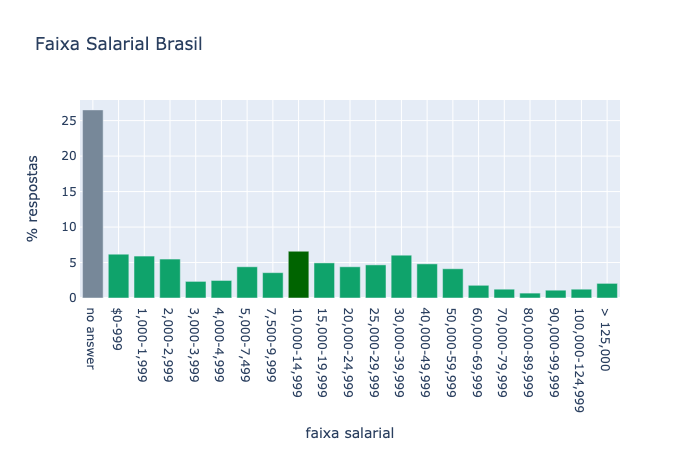

In [55]:
colors = ['#0fa36b',] * 26
colors[0] = 'lightslategray'
colors[8] = 'darkgreen'

fig = go.Figure([go.Bar(x=br_yearly_compensation['yearly_compensation(USD)'], 
                        y= br_yearly_compensation['total per %'],
                        marker_color=colors)])
fig.update_layout(title= "Faixa Salarial Brasil", 
                  yaxis_title = '% respostas',
                 xaxis_title = 'faixa salarial')
py.offline.iplot(fig, filename='horizontal-bar')

In [56]:
#checking the biggest salary range
filter_salary = br_yearly_compensation.loc[br_yearly_compensation['yearly_compensation(USD)'] != 'no answer', 
                            'total per %'].max()
br_yearly_compensation.loc[br_yearly_compensation['total per %'] == filter_salary]

,yearly_compensation(USD),total_responses,total per %,sort
8,"10,000-14,999",48,6.59,10.0


NaN values are understanding as "no answer" for us. It is around 26% of the people in Brazil who has answered the survey.</p>

### Data Roles ####

According Glassdor website, this are the mean monthly salary * to:


1. Business Analyst: 3.264 reais
2. Data Analyst: 4.249 reais
3. Data Scientist: 7.146 reais


*Source:*
1. https://www.glassdoor.com.br/Sal%C3%A1rios/business-analyst-i-sal%C3%A1rio-SRCH_KO0,18.htm
2. https://www.glassdoor.com.br/Sal%C3%A1rios/analista-de-dados-sal%C3%A1rio-SRCH_KO0,17.htm
3. https://www.glassdoor.com.br/Sal%C3%A1rios/cientista-de-dados-sal%C3%A1rio-SRCH_KO0,18.htm

The salary's value are in Real. Convert it to USD: (USD: 5,39) date 30/08
1. USD 685.57 per month
2. USD 788.31 per month
3. USD 1325.78 per month

**Yearly Compensation** :
1. USD 8226.84
2. USD 9459.72
3. USD 15903.72

**MY** Target Yearly Compensation = USD 10,018.55 (around R\$ 3,500 per month)



Create a 3 salary range:

    Low income range( 0-10,000)

    Mid income range(10,000- 20,000)

    High income range(> 20,000 )


In [57]:
#Adjusting data

# checking currents that working with data in their daily activities
brazil_salary = brazil_salary.loc[(brazil_salary['current role'] == 'Business Analyst') |
                                                  (brazil_salary['current role'] == 'Data Analyst') |
                                                  (brazil_salary['current role'] == 'Data Scientist') |
                                                  (brazil_salary['current role'] == 'Statistician')]
#create a new variable
new_range=[]
for salary in brazil_salary['yearly_compensation(USD)']:
    if salary in ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999']:
        new_range.append('Low Income Range')
    elif salary in ['10,000-14,999','15,000-19,999']:
        new_range.append('Mid Income Range')
    elif salary in ['no answer']:
        new_range.append('no answer')
    
    else :
        new_range.append('High Income Range')
        
brazil_salary['salary_range']=new_range

In [58]:
pd.crosstab(brazil_salary['salary_range'] ,brazil_salary['current role'], margins = True)

current role,Business Analyst,Data Analyst,Data Scientist,Statistician,All
salary_range,,,,,
High Income Range,22,14,68,9,113
Low Income Range,16,35,50,3,104
Mid Income Range,8,11,26,0,45
no answer,2,3,20,4,29
All,48,63,164,16,291


In [59]:
br_role_salary = pd.crosstab(brazil_salary['salary_range'] ,brazil_salary['current role']).apply(lambda r: 
                                                                                np.round(((r/r.sum())*100), 
                                                                                decimals = 2), axis=0)
br_role_salary = br_role_salary.reset_index()                                                                

In [60]:
br_role_salary

current role,salary_range,Business Analyst,Data Analyst,Data Scientist,Statistician
0,High Income Range,45.83,22.22,41.46,56.25
1,Low Income Range,33.33,55.56,30.49,18.75
2,Mid Income Range,16.67,17.46,15.85,0.00
3,no answer,4.17,4.76,12.20,25.00


In [61]:
br_educ_salary = pd.crosstab(brazil_salary['salary_range'] ,brazil_salary['education_level']).apply(lambda r: 
                                                                                np.round(((r/r.sum())*100), 
                                                                                decimals = 2), axis=0)
br_educ_salary.reset_index()

education_level,salary_range,Doctoral degree,Higher Education,I prefer not to answer,Master’s degree,No formal education past high school
0,High Income Range,46.43,29.84,33.33,44.78,100.0
1,Low Income Range,35.71,41.13,33.33,31.34,0.0
2,Mid Income Range,7.14,19.35,33.33,13.43,0.0
3,no answer,10.71,9.68,0.00,10.45,0.0


44% DA are bachelor's degree